In [1]:
def main():
    name = "Sabareesan"
    role = "Research Scholar from VIT, Vellore"
    greeting = f"Hello, I'm {name}, a {role}!"
    print(greeting)

if __name__ == "__main__":
    main()

Hello, I'm Sabareesan, a Research Scholar from VIT, Vellore!


# 1- Import All Library

In [2]:
import numpy as np #allow efficient mathematical operations on arrays.Used for numerical computations, linear algebra, and data manipulation.
import pandas as pd #provides data structures (Series and DataFrame) for handling and analyzing tabular data
import os
import matplotlib.pyplot as plt # for creating visualizations
import glob #Used for batch processing files with similar names or extensions
import nibabel as nib #neuroscience and medical imaging research.
import cv2 #rovides functions for image manipulation, feature extraction, and object detection
import imageio #for reading and writing image data, oading images into memory, creating animations, and saving visualizations
from tqdm.notebook import tqdm #Useful for tracking the progress of time-consuming operations (e.g., data processing, downloads).
from ipywidgets import * #for creating dynamic visualizations and interactive controls
from PIL import Image #for creating dynamic visualizations and interactive controls
from fastai.basics import * #for building custom models and working with data pipelines
from fastai.vision.all import * #for image classification, and segmentation
from fastai.data.transforms import * #provides various data transformation functions
import random #for simulations, shuffling data, and creating random samples
from matplotlib.pyplot import figure #Used for creating charts, histograms, scatter plots, and other types of graphs
import nibabel as nib #used for reading and writing NIfTI files
from sklearn.model_selection import train_test_split #to split a dataset into training and testing sets
from tensorflow.keras.layers import *#use to build the architecture of a neural network model.
from tensorflow.keras.models import Model #llows to create a model by specifying its inputs and outputs.
from tensorflow.keras.optimizers import Adam

2024-07-01 05:15:18.544946: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-01 05:15:18.545075: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-01 05:15:18.697405: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# 2- Preprocessing

In [3]:
files=[]
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
      files.append((dirname, filename))

In [4]:
# Create a DataFrame from the file list
df_files = pd.DataFrame(files, columns=['dirname', 'filename'])

# Sort the DataFrame by filename in ascending order
df_files = df_files.sort_values(by='filename')

# Display the DataFrame
print(df_files.head())

                                                  dirname  \
0                                  /kaggle/input/resnet50   
90   /kaggle/input/liver-tumor-segmentation/segmentations   
82   /kaggle/input/liver-tumor-segmentation/segmentations   
143  /kaggle/input/liver-tumor-segmentation/segmentations   
32   /kaggle/input/liver-tumor-segmentation/segmentations   

                 filename  
0     resnet50_weights.h5  
90     segmentation-0.nii  
82     segmentation-1.nii  
143   segmentation-10.nii  
32   segmentation-100.nii  


In [5]:
# Map CT scan and label

df_files["mask_dirname"]  = ""
df_files["mask_filename"] = ""

for i in range(131):
    ct = f"volume-{i}.nii"
    mask = f"segmentation-{i}.nii"

    df_files.loc[df_files['filename'] == ct, 'mask_filename'] = mask
    df_files.loc[df_files['filename'] == ct, 'mask_dirname'] = "/kaggle/input/liver-tumor-segmentation/segmentations"

# drop segment rows
df_files = df_files[df_files.mask_filename != ''].sort_values(by=['filename']).reset_index(drop=True)

df_files

,dirname,filename,mask_dirname,mask_filename
0,/kaggle/input/liver-tumor-segmentation/volume_pt1,volume-0.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-0.nii
1,/kaggle/input/liver-tumor-segmentation/volume_pt1,volume-1.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-1.nii
2,/kaggle/input/liver-tumor-segmentation/volume_pt1,volume-10.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-10.nii
3,/kaggle/input/liver-tumor-segmentation/volume_pt2,volume-11.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-11.nii
4,/kaggle/input/liver-tumor-segmentation/volume_pt2,volume-12.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-12.nii
5,/kaggle/input/liver-tumor-segmentation/volume_pt2,volume-13.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-13.nii
6,/kaggle/input/liver-tumor-segmentation/volume_pt2,volume-14.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-14.nii
7,/kaggle/input/liver-tumor-segmentation/volume_pt2,volume-15.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-15.nii
8,/kaggle/input/liver-tumor-segmentation/volume_pt2,volume-16.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-16.nii
9,/kaggle/input/liver-tumor-segmentation/volume_pt2,volume-17.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-17.nii


# 3- Read 'nii' File 

In [6]:
def read_nii(filepath):
    ct_scan = nib.load(filepath)  # Load the NIfTI file using the nibabel library
    array = ct_scan.get_fdata()   # Get the data as a numpy array
    array = np.rot90(np.array(array))  # Rotate the array by 90 degrees counter-clockwise
    return(array)  # Return the rotated array

# Set the variable 'sample' to 40
sample = 40

# Read a CT scan file using the 'read_nii' function
sample_ct = read_nii(df_files.loc[sample,'dirname']+"/"+df_files.loc[sample,'filename'])

# Read a Mask scan file using the 'read_nii' function
sample_mask = read_nii(df_files.loc[sample,'mask_dirname']+"/"+df_files.loc[sample,'mask_filename'])

# Display the shape of the CT and Mask images
print(f'CT Shape:   {sample_ct.shape}\nMask Shape: {sample_mask.shape}')


CT Shape:   (512, 512, 74)
Mask Shape: (512, 512, 74)


# 3.1- Preprocess the 'nii' file

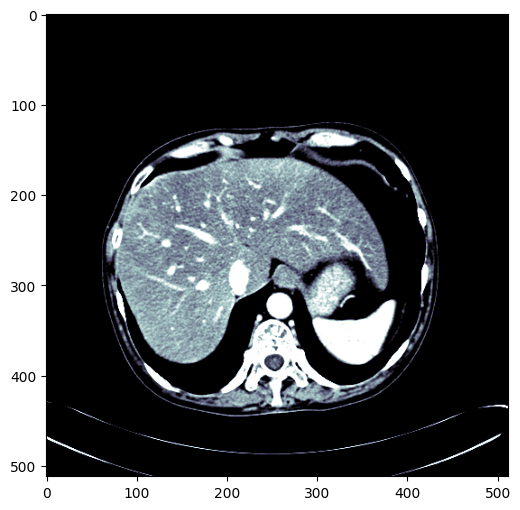

In [7]:
# Preprocess the nii file
#it extends the functionality of PyTorch's
dicom_windows = types.SimpleNamespace(
    brain=(80,40),
    subdural=(254,100),
    stroke=(8,32),
    brain_bone=(2800,600),
    brain_soft=(375,40),
    lungs=(1500,-600),
    mediastinum=(350,50),
    abdomen_soft=(400,50),
    liver=(150,30),
    spine_soft=(250,50),
    spine_bone=(1800,400),
    custom = (200,60)
)
#This decorator is used to add a new method windowed to the Tensor class.
@patch
#The result is a tensor with pixel values scaled between 0 and 1, representing the windowed image.
def windowed(self:Tensor, w, l):
    px = self.clone()
    px_min = l - w//2
    px_max = l + w//2
    px[px<px_min] = px_min
    px[px>px_max] = px_max
    return (px-px_min) / (px_max-px_min)

figure(figsize=(8, 6), dpi=100)
#It appears you're applying the liver window settings (dicom_windows.liver) to the slice to visualize the liver tissue in the CT scan
plt.imshow(tensor(sample_ct[..., 55].astype(np.float32)).windowed(*dicom_windows.liver), cmap=plt.cm.bone);

# 3.2- Read 'nii' File and Show Original Data

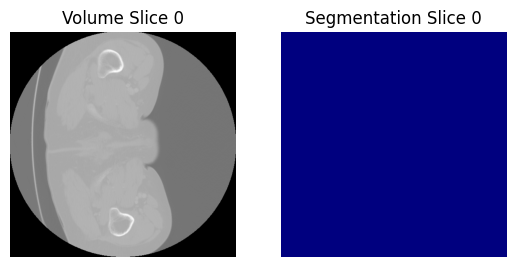

In [8]:
# this code read nii file and show original data

# Load the NIfTI file containing the volume
volume_nifti = nib.load('/kaggle/input/liver-tumor-segmentation/volume_pt1/volume-0.nii')

# Load the NIfTI file containing the segmentation image
segmentation_nifti = nib.load('/kaggle/input/liver-tumor-segmentation/segmentations/segmentation-0.nii')

# Extract the data arrays from the NIfTI files
volume_data = volume_nifti.get_fdata()
segmentation_data = segmentation_nifti.get_fdata()

# Choose a slice to display (e.g., slice 0 along the first axis)
slice_index = 0

# Plot the volume slice
plt.subplot(1, 2, 1)
plt.imshow(volume_data[..., slice_index], cmap='gray')
plt.title('Volume Slice {}'.format(slice_index))
plt.axis('off')

# Plot the segmentation slice
plt.subplot(1, 2, 2)
plt.imshow(segmentation_data[..., slice_index], cmap='jet')  # Adjust the colormap as needed
plt.title('Segmentation Slice {}'.format(slice_index))
plt.axis('off')

plt.show()

In [9]:
def plot_sample(array_list, color_map = 'nipy_spectral'):
    '''
    Plots and a slice with all available annotations
    '''
    fig = plt.figure(figsize=(20,16), dpi=100)

    plt.subplot(1,4,1)
    plt.imshow(array_list[0], cmap='bone')
    plt.title('Original Image')
    plt.axis('off')
    #presumably a medical image, converts it to a PyTorch tensor, and applies windowing using the parameters from dicom_windows.liver. It uses the 'bone' color map for visualization, adds a title "Windowed Image", and turns off the axis.
    plt.subplot(1,4,2)
    plt.imshow(tensor(array_list[0].astype(np.float32)).windowed(*dicom_windows.liver), cmap='bone');
    plt.title('Windowed Image')
    plt.axis('off')

    plt.subplot(1,4,3)
    plt.imshow(array_list[1], alpha=0.5, cmap=color_map)
    plt.title('Mask')
    plt.axis('off')

    plt.subplot(1,4,4)
    plt.imshow(array_list[0], cmap='bone')
    plt.imshow(array_list[1], alpha=0.5, cmap=color_map)
    plt.title('Liver & Mask')
    plt.axis('off')

    plt.show()

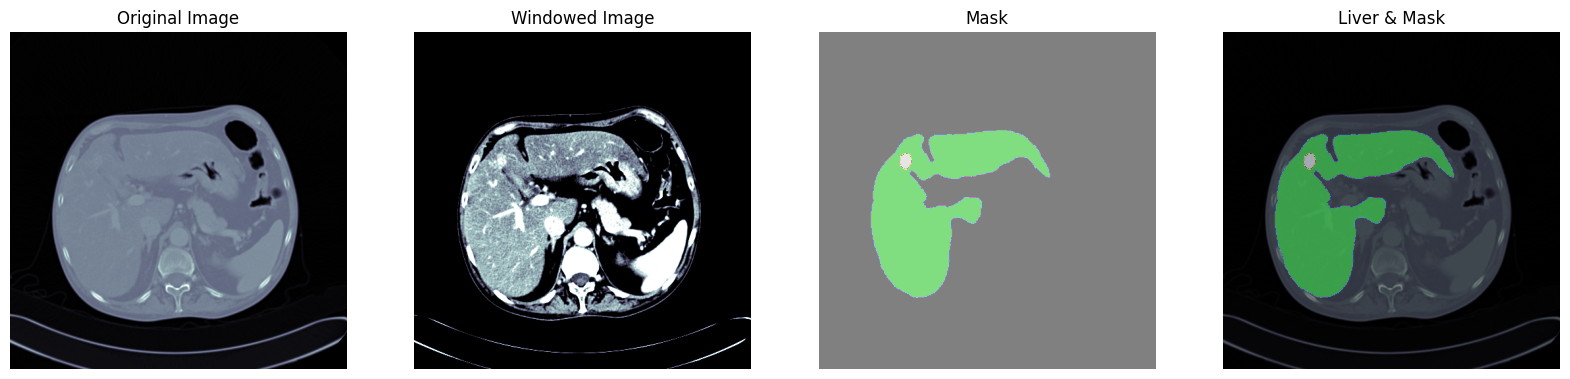

In [10]:
sample = 40

sample_slice = tensor(sample_ct[...,sample].astype(np.float32))

plot_sample([sample_ct[..., sample],
             sample_mask[..., sample]])

# 3.3- Preprocessing Functions

<Axes: >

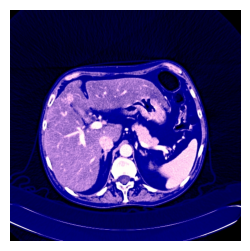

In [11]:
# Preprocessing functions
class TensorCTScan(TensorImageBW): _show_args = {'cmap':'bone'} #a subclass of a PyTorch Tensor designed to handle black-and-white images.

@patch
def freqhist_bins(self:Tensor, n_bins=100):
    "A function to split the range of pixel values into groups, such that each group has around the same number of pixels"
    imsd = self.view(-1).sort()[0]
    t = torch.cat([tensor([0.001]),
                   torch.arange(n_bins).float()/n_bins+(1/2/n_bins),
                   tensor([0.999])])
    t = (len(imsd)*t).long()
    return imsd[t].unique()

@patch
def hist_scaled(self:Tensor, brks=None):
    "Scales a tensor using `freqhist_bins` to values between 0 and 1"
    if self.device.type=='cuda': return self.hist_scaled_pt(brks)
    if brks is None: brks = self.freqhist_bins()
    ys = np.linspace(0., 1., len(brks))
    x = self.numpy().flatten()
    x = np.interp(x, brks.numpy(), ys)
    return tensor(x).reshape(self.shape).clamp(0.,1.)


@patch
def to_nchan(x:Tensor, wins, bins=None):
    res = [x.windowed(*win) for win in wins]
    if not isinstance(bins,int) or bins!=0: res.append(x.hist_scaled(bins).clamp(0,1))
    dim = [0,1][x.dim()==3]
    return TensorCTScan(torch.stack(res, dim=dim))

@patch
def save_jpg(x:(Tensor), path, wins, bins=None, quality=120): #unction to convert the tensor to a multi-channel image suitable for saving as a JPG.The image is saved with the specified quality.
    fn = Path(path).with_suffix('.jpg')
    x = (x.to_nchan(wins, bins)*255).byte()
    im = Image.fromarray(x.permute(1,2,0).numpy(), mode=['RGB','CMYK'][x.shape[0]==4])
    im.save(fn, quality=quality)

_,axs = subplots(1,1)

sample_slice.save_jpg('test.jpg', [dicom_windows.liver, dicom_windows.custom])
show_image(Image.open('test.jpg'), ax=axs[0], figsize=(8, 6))

# 4- Generate *Unet Training* Image From 'nii' File

In [12]:
GENERATE_JPG_FILES = True

if GENERATE_JPG_FILES:

    path = Path(".")

    os.makedirs('train_images', exist_ok=True)
    os.makedirs('train_masks', exist_ok=True)

    ## test folder
    os.makedirs('test_images', exist_ok=True)
    os.makedirs('test_masks', exist_ok=True)

    # Split the data into train and test sets
    train_df, test_df = train_test_split(df_files, test_size=0.1, random_state=42)

    # Check if train_df is empty
    print("Length of train_df:", len(train_df))

    # Reset index for contiguous indices
    train_df = train_df.reset_index(drop=True)
    # Check if test_df is empty
    print("Length of test_df:", len(test_df))
    test_df = test_df.reset_index(drop=True)

    # Loop for training set
    for ii in tqdm(range(len(train_df))):
        curr_ct = read_nii(train_df.loc[ii, 'dirname'] + "/" + train_df.loc[ii, 'filename'])
        curr_mask = read_nii(train_df.loc[ii, 'mask_dirname'] + "/" + train_df.loc[ii, 'mask_filename'])
        curr_file_name = str(train_df.loc[ii, 'filename']).split('.')[0]
        curr_dim = curr_ct.shape[2]

        for curr_slice in range(0, curr_dim, 2):
            data = tensor(curr_ct[..., curr_slice].astype(np.float32))
            mask = Image.fromarray(curr_mask[..., curr_slice].astype('uint8'), mode="L")
            data.save_jpg(f"train_images/{curr_file_name}_slice_{curr_slice}.jpg", [dicom_windows.liver, dicom_windows.custom])
            mask.save(f"train_masks/{curr_file_name}_slice_{curr_slice}_mask.png")

    ### test image save
    for ii in tqdm(range(len(test_df))):
        curr_ct = read_nii(test_df.loc[ii, 'dirname'] + "/" + test_df.loc[ii, 'filename'])
        curr_mask = read_nii(test_df.loc[ii, 'mask_dirname'] + "/" + test_df.loc[ii, 'mask_filename'])
        curr_file_name = str(test_df.loc[ii, 'filename']).split('.')[0]
        curr_dim = curr_ct.shape[2]

        for curr_slice in range(0, curr_dim, 2):
            data = tensor(curr_ct[..., curr_slice].astype(np.float32))
            mask = Image.fromarray(curr_mask[..., curr_slice].astype('uint8'), mode="L")
            data.save_jpg(f"test_images/{curr_file_name}_slice_{curr_slice}.jpg", [dicom_windows.liver, dicom_windows.custom])
            mask.save(f"test_masks/{curr_file_name}_slice_{curr_slice}_mask.png")

else:
    path = Path("../input/liver-segmentation-with-fastai-v2")  # read jpg from saved kernel output

Length of train_df: 45
Length of test_df: 6


  0%|          | 0/45 [00:00<?, ?it/s]

pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


  0%|          | 0/6 [00:00<?, ?it/s]

pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


# 4.1- Show Data

In [13]:
print("\nFirst few rows of Training Set:")
print(train_df.head())

print("\nFirst few rows of Testing Set:")
print(test_df.head())


First few rows of Training Set:
                                             dirname       filename  \
0  /kaggle/input/liver-tumor-segmentation/volume_pt3  volume-24.nii   
1  /kaggle/input/liver-tumor-segmentation/volume_pt4  volume-38.nii   
2  /kaggle/input/liver-tumor-segmentation/volume_pt2  volume-11.nii   
3  /kaggle/input/liver-tumor-segmentation/volume_pt4  volume-36.nii   
4  /kaggle/input/liver-tumor-segmentation/volume_pt2  volume-20.nii   

                                           mask_dirname        mask_filename  
0  /kaggle/input/liver-tumor-segmentation/segmentations  segmentation-24.nii  
1  /kaggle/input/liver-tumor-segmentation/segmentations  segmentation-38.nii  
2  /kaggle/input/liver-tumor-segmentation/segmentations  segmentation-11.nii  
3  /kaggle/input/liver-tumor-segmentation/segmentations  segmentation-36.nii  
4  /kaggle/input/liver-tumor-segmentation/segmentations  segmentation-20.nii  

First few rows of Testing Set:
                                  

In [14]:
print("\ntrain df data shape:")
print(train_df.shape)


train df data shape:
(45, 4)


In [15]:
print("\ntest df data shape:")
print(test_df.shape)


test df data shape:
(6, 4)


# 5- Resizing Images

In [16]:
# Set the directories
train_images_dir = '/kaggle/working/train_images'
train_masks_dir = '/kaggle/working/train_masks'

# Get the list of image file names
all_image_file_names = sorted(os.listdir(train_images_dir))

# Determine the sample size
sample_size = min(9000, len(all_image_file_names))

# Randomly select images
selected_image_file_names = random.sample(all_image_file_names, sample_size)

# Load selected images and masks with resizing nd converted to numpy arrays
target_size = (128, 128)
train_images = [np.array(Image.open(os.path.join(train_images_dir, fname)).resize(target_size)) for fname in selected_image_file_names]

# Adjust file extension for masks 
mask_file_names = [fname.replace('.jpg', '_mask.png') for fname in selected_image_file_names]
train_masks = [np.array(Image.open(os.path.join(train_masks_dir, fname)).resize(target_size)) for fname in mask_file_names]

# Convert the lists to numpy arrays  for further processing
train_images = np.array(train_images)
train_masks = np.array(train_masks)

# Normalize images to [0, 1]
train_images =train_images / 255.0

# Reshape masks to include a channel dimension
train_masks =train_masks.reshape((train_masks.shape[0], train_masks.shape[1], train_masks.shape[2], 1))

In [17]:
# Set the directories
test_images_dir = '/kaggle/working/test_images'
test_masks_dir = '/kaggle/working/test_masks'

# Get the list of image file names
all_image_file_names = sorted(os.listdir(test_images_dir))

# Determine the sample size
sample_size = min(9000, len(all_image_file_names))

# Randomly select images
selected_image_file_names = random.sample(all_image_file_names, sample_size)

# Load selected images and masks with resizing
target_size = (128, 128)
test_images = [np.array(Image.open(os.path.join(test_images_dir, fname)).resize(target_size)) for fname in selected_image_file_names]

# Adjust file extension for masks
mask_file_names = [fname.replace('.jpg', '_mask.png') for fname in selected_image_file_names]
test_masks = [np.array(Image.open(os.path.join(test_masks_dir, fname)).resize(target_size)) for fname in mask_file_names]

# Convert the lists to numpy arrays
test_images = np.array(test_images)
test_masks = np.array(test_masks)

# Normalize images to [0, 1]
test_images =test_images / 255.0

# Reshape masks to include a channel dimension
test_masks =test_masks.reshape((test_masks.shape[0], test_masks.shape[1], test_masks.shape[2], 1))

In [18]:
print(f"Train image ={len(train_images)} Test image={len(test_images)}")
print(f"Train mask ={len(train_masks)}  Test mask={len(test_masks)}")

Train image =8556 Test image=699
Train mask =8556  Test mask=699


# 6- Split Data Train Test and Validation

In [19]:
x_valid, x_test, y_valid, y_test = train_test_split(test_images, test_masks, test_size=1/3, random_state=42)

In [20]:
print(f"train image={train_images.shape} and train_masks={train_masks.shape}")
print(f"X valid shape ={x_valid.shape} x_test={x_test.shape}")
print(f"y valid shape ={y_valid.shape}  y_test={y_test.shape}")

train image=(8556, 128, 128, 3) and train_masks=(8556, 128, 128, 1)
X valid shape =(466, 128, 128, 3) x_test=(233, 128, 128, 3)
y valid shape =(466, 128, 128, 1)  y_test=(233, 128, 128, 1)


# 6.1- Display Random Images and Masks

In [21]:
def display_images_and_masks(images, masks, num_samples=2):
    # Randomly select 'num_samples' number of indices from the available images.
    sample_indices = random.sample(range(images.shape[0]), num_samples)
    
    # Loop through each sample.
    for i in range(num_samples):
        index = sample_indices[i]  # Get the index of the current sample.
        
        #  Display the image.
        plt.subplot(num_samples, 2, 2 * i + 1)  # Prepare a subplot.
        plt.imshow(images[index])  # Show the image at the selected index.
        plt.title("Image {}".format(index))  # Set the title for the image.
        plt.axis("off")  # Turn off the axis.
        
        #  Display the corresponding mask.
        plt.subplot(num_samples, 2, 2 * i + 2)  # Prepare the next subplot.
        plt.imshow(masks[index].squeeze(), cmap='gray')  # Show the mask with a grayscale colormap.
        plt.title("Mask {}".format(index))  # Set the title for the mask.
        plt.axis("off")  # Turn off the axis.
    
    # Display all the subplots.
    plt.show()


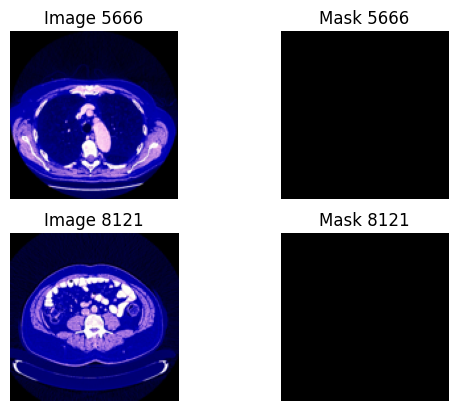

In [22]:
# Display two random images and masks
display_images_and_masks(train_images, train_masks)

# 7- Model Training

# 7.1 - UNET and VGG19 Model

In [23]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, UpSampling2D, Concatenate

def build_vgg19_unet(input_shape=(128, 128, 3), num_classes=1):
    # Define the VGG19 model with custom top layers for segmentation
    base_model = VGG19(weights=None, include_top=False, input_tensor=Input(shape=input_shape))

    # Encoder part of the UNet architecture
    # Freeze layers in the VGG19 model
    for layer in base_model.layers:
        layer.trainable = False

    # Get the output of the last layer of VGG19
    encoder_output = base_model.output

    # Decoder part of the UNet architecture
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(encoder_output)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)

    x = UpSampling2D((2, 2))(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)

    x = UpSampling2D((2, 2))(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)

    x = UpSampling2D((2, 2))(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)

    x = UpSampling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)

    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)

    # Output layer
    output = Conv2D(num_classes, (1, 1), activation='sigmoid')(x)

    # Create model
    model = Model(inputs=base_model.input, outputs=output)

    return model


In [24]:
#calling the build_model function to create a new model based on the ResNet50 architecture
# Create the model using the build_vgg19_unet function
model = build_vgg19_unet()

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [25]:
# Train the model using the training data.
# 'train_images' are the input images for training.
# 'train_masks' are the corresponding ground truth masks for the input images.
# 'batch_size' is set to 32, meaning the model will update weights after every 32 samples.
# 'epochs' is set to 10, meaning the model will go through the entire dataset 10 times.
# 'validation_data' is a tuple containing the validation dataset and its corresponding masks.
# The model's performance is evaluated on this validation dataset after each epoch.
history = model.fit(train_images, train_masks, batch_size=32, epochs=10, validation_data=(x_valid, y_valid))


Epoch 1/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 2059s 8s/step - accuracy: 0.9726 - loss: 0.1210 - val_accuracy: 0.9790 - val_loss: 0.0502
Epoch 2/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 2024s 8s/step - accuracy: 0.9836 - loss: 0.0377 - val_accuracy: 0.9885 - val_loss: 0.0286
Epoch 3/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 2018s 8s/step - accuracy: 0.9867 - loss: 0.0296 - val_accuracy: 0.9889 - val_loss: 0.0426
Epoch 4/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 2015s 8s/step - accuracy: 0.9833 - loss: 0.0411 - val_accuracy: 0.9723 - val_loss: 0.0694
Epoch 5/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 2014s 8s/step - accuracy: 0.9811 - loss: 0.0431 - val_accuracy: 0.9883 - val_loss: 0.0255
Epoch 6/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 2065s 8s/step - accuracy: 0.9876 - loss: 0.0238 - val_accuracy: 0.9887 - val_loss: 0.0336
Epoch 7/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 2017s 8s/step - accuracy: 0.9881 - loss: 0.0326 - val_accuracy: 0.9754 - val_loss: 0.0499
Epoch 8/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 2042s 8s/step - accuracy: 0.9850 - loss: 0.0351 - 

# 7.2 - Plot Training & Validation Loss Values

In [26]:
def plot_history(history):
    # Plot the training loss values
    plt.plot(history.history['loss'])
    # Plot the validation loss values
    plt.plot(history.history['val_loss'])
    # Set the title of the plot to 'Model loss'
    plt.title('Model loss')
    # Set the y-axis label of the plot to 'Loss'
    plt.ylabel('Loss')
    # Set the x-axis label of the plot to 'Epoch'
    plt.xlabel('Epoch')
    # Add a legend to the plot with labels 'Train' for training loss and 'Validation' for validation loss
    plt.legend(['Train', 'Validation'], loc='upper left')
    # Display the plot
    plt.show()


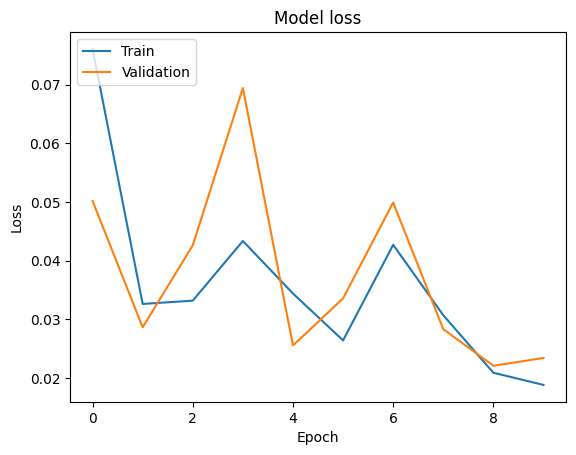

In [27]:
plot_history(history)

# 7.3 - Evaluate, Prediction & Score

In [28]:
# Evaluate the model using the validation dataset.
# 'x_valid' are the input images for validation.
# 'y_valid' are the corresponding ground truth masks for the validation images.
scores = model.evaluate(x_valid, y_valid)

# 'scores' is a list containing the loss as the first element and the accuracy as the second element.
# By accessing 'scores[1]', we retrieve the accuracy of the model on the validation dataset.
accuracy = scores[1]


15/15 ━━━━━━━━━━━━━━━━━━━━ 69s 5s/step - accuracy: 0.9896 - loss: 0.0250


In [29]:
prediction = model.predict(x_test)# Use the trained model to make predictions on the test dataset.

# 'x_test' contains the input images for testing.
prediction = model.predict(x_test)

# 'prediction' will contain the output predictions for each input image in 'x_test'.
# For a segmentation model, this would typically be a mask indicating the segmented areas.


8/8 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 34s 4s/step


In [30]:
# Evaluate the model using the test data (x_test, y_test)
test_scores = model.evaluate(x_test, y_test)

# test_scores is a list that contains the loss as the first element and the accuracy as the second element.
# Here, we are accessing the second element, which is the accuracy of the model on the test data.
accuracy = test_scores[1]


8/8 ━━━━━━━━━━━━━━━━━━━━ 34s 4s/step - accuracy: 0.9883 - loss: 0.0272


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


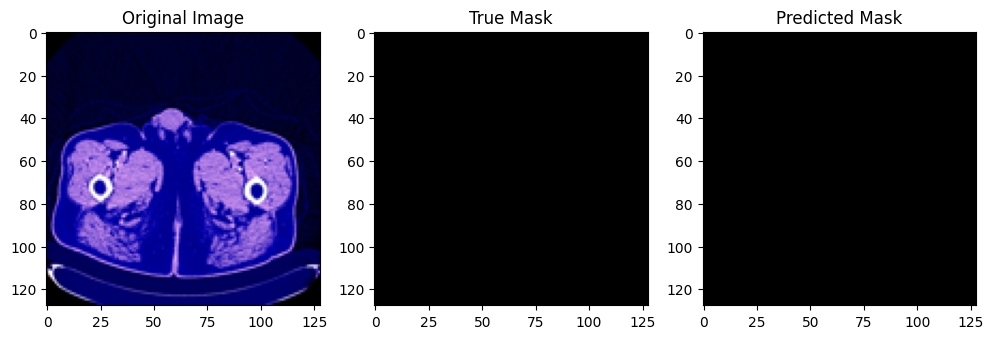

In [31]:
image_index = 44

# Load the image and true mask
input_image = x_test[image_index]
true_mask = y_test[image_index]

# Obtain the predicted mask from model2
predicted_mask = model.predict(np.expand_dims(input_image, axis=0))[0]

# Threshold the predicted mask (assuming it's a binary mask)
threshold = 0.5  # Adjust this threshold based on your model's output
predicted_mask_binary = (predicted_mask > threshold).astype(np.uint8)

# Plotting
plt.figure(figsize=(12, 4))

# Plot original image
plt.subplot(1, 3, 1)
plt.imshow(input_image)
plt.title('Original Image')

# Plot true mask
plt.subplot(1, 3, 2)
plt.imshow(true_mask[:, :, 0], cmap='gray')
plt.title('True Mask')

# Plot predicted mask
plt.subplot(1, 3, 3)
plt.imshow(predicted_mask_binary, cmap='gray')
plt.title('Predicted Mask')

plt.show()

In [32]:
initial_segmentation_results = model.predict(x_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 34s 4s/step
